
# D207 Assessment



<br><br>




## Menachem Korn


<br><br>



### A 
###### A1. Question of analysis
Are there differences between the different marital statuses and income?

Null hypothesis - There is no difference in income between the groups.<br>
Alternative hypothesis - There is a difference in income between the groups.<br>
The p-value chosen is 0.05.
###### A2. Stakeholders
Stakeholders can better determine how to target marketing compaigns based only on marital status. If the differences are deterimined to be statistically significant, customers who haven't filled out their income level, which is private and delicate information, may be better targeted by only knowing their marital status.
###### A3. Variables
The independant variable is Marital from and the dependant variable will be Income.

### B 
###### B1. Code

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df = pd.read_csv('churn_clean.csv')

In [3]:
# Cleaning the data
# filling missing Income values with the median
df.Income.fillna(df.Income.median(), inplace=True)

In [4]:
# re-expression of categorical variables
categorical_list = ['Job', 'Marital', 'Area',
       'Gender', 'Churn',  'Techie', 'Contract', 'Port_modem', 'Tablet',
       'InternetService', 'Phone', 'Multiple', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'PaymentMethod', 
       'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8']
# re-expression
df[categorical_list] = df[categorical_list].apply(lambda x: x.astype('category'))

In [5]:
# get values for marital status
df.Marital.value_counts()

Divorced         2092
Widowed          2027
Separated        2014
Never Married    1956
Married          1911
Name: Marital, dtype: int64

In [6]:
#Income
df[abs(df.Income - df.Income.mean())/df.Income.std() > 3]

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
46,47,B609739,bb4a7c2d-6524-41d6-b2ed-f7511509ff5b,e0f8186edebc6ed9650b5dce5496960d,Peoria,IL,Peoria,61606,40.69980,-89.61143,...,184.964681,2384.885909,4,4,5,2,2,4,3,3
130,131,X645702,cfc79a87-f608-485d-86c9-cfce7db37a29,5e3d575e862fe7b14141e0de9df0963f,Dennison,OH,Tuscarawas,44621,40.42752,-81.29587,...,139.965008,1162.332926,3,3,4,2,4,4,3,2
186,187,F501848,b47490b5-a967-4f46-a76a-600552c4d141,b0f2d7fc1816d09553939374720d815a,Beckville,TX,Panola,75631,32.24926,-94.45456,...,107.495766,1468.357421,3,3,3,3,5,2,4,3
470,471,Q585011,e018df7d-ad42-41c7-9971-75ddf0a3f9ee,8c9b9ab7daea9d49ffe87537b768bc1f,Saint Marie,MT,Valley,59231,48.39806,-106.54796,...,192.440432,499.717065,3,4,4,3,4,3,2,3
511,512,X286988,9fb14b9f-a39c-48bc-9cdf-3cad65435793,f4be95644bf605613c2c01ce8c800851,Ardmore,TN,Giles,38449,35.04820,-86.82587,...,92.455141,1216.325478,3,3,3,3,4,4,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9615,9616,X447899,6fb07a81-0fa0-4484-ae02-81a76506696c,8b65fc759158500642f6c1691655db62,Queen City,TX,Cass,75572,33.23153,-94.13216,...,222.636200,5702.684165,3,4,2,2,5,3,4,3
9639,9640,K483384,663eaa8d-1ae1-4305-814e-0abbed5c8260,3eafb252105ddf1c5f36e243754d81ed,Moorhead,MS,Sunflower,38761,33.43204,-90.48489,...,187.642200,6140.576122,2,2,2,4,3,3,3,5
9656,9657,T234307,8ce025a0-86b1-4e33-9c97-f9c8408e7689,70f2850a5d3d97adb8acfbffca4f4f53,Guernsey,IA,Poweshiek,52221,41.64197,-92.33228,...,202.636200,6603.944194,3,4,4,2,3,4,4,4
9849,9850,C406267,5fae818b-cdcb-452e-bb5a-c9dc04ed9383,5c2620fb2505cfbdc7cd070c02726ef1,Laporte,CO,Larimer,80535,40.73342,-105.18350,...,144.960700,4516.882554,4,4,4,2,5,3,3,4


In [7]:
# create arrays for catagories
income_divorced = df[df.Marital == 'Divorced'].Income
income_married = df[df.Marital == 'Married'].Income
income_never_married = df[df.Marital == 'Never Married'].Income
income_separated = df[df.Marital == 'Separated'].Income
income_widowed = df[df.Marital == 'Widowed'].Income

In [8]:
# The following code domes from the datacamp course
# [Performing Experiments in Python, Part 2, One-Way Anova] 
# anova
anova = stats.f_oneway(income_divorced, income_married, income_never_married, income_separated, income_widowed)

###### B2. Anova Output

In [9]:
anova[1]

0.7835095046055403

Based on the resulting p-value of 0.78 which is higher than our alpha of 0.05 we fail to reject the null hypothesis, thus we can not determine any statistically significant difference between the groups.

###### B3. Justification of Anova
Anova was chosen as the statistical test, being that there are more than two catagories in our independent variable, thus a t-test is unsuitable, and our target varialbe is a continuous variable.

###### C. Univariate statistics

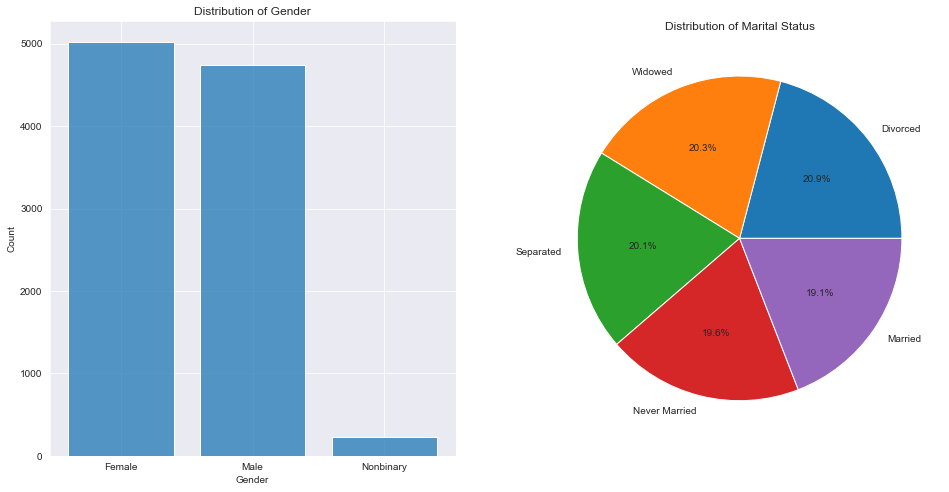

In [10]:
sns.set_style(style='darkgrid')
fig, ax = plt.subplots(1,2, figsize=(16,8))
sns.histplot( x="Gender", data=df, stat="count", ax=ax[0], shrink=.8)
ax[0].title.set_text('Distribution of Gender')
ax[0].set_ylabel("Count")
pie_x = df.Marital.value_counts()
ax[1].pie(pie_x, labels=pie_x.index, autopct='%1.1f%%' )
ax[1].title.set_text('Distribution of Marital Status')
plt.show()

In [11]:
df.groupby(['Gender']).size().reset_index(name='Count')

,Gender,Count
0,Female,5025
1,Male,4744
2,Nonbinary,231


In [12]:
df.groupby(['Marital']).size().reset_index(name='Count')

,Marital,Count
0,Divorced,2092
1,Married,1911
2,Never Married,1956
3,Separated,2014
4,Widowed,2027


We see the distribution of gender fall heavily between male and female with less than 2.5% identifying as Nonbinary.<br>
For marital statuses, the groups fall rather close together, being that all five groups are within one percentage point from a fifth of the population.

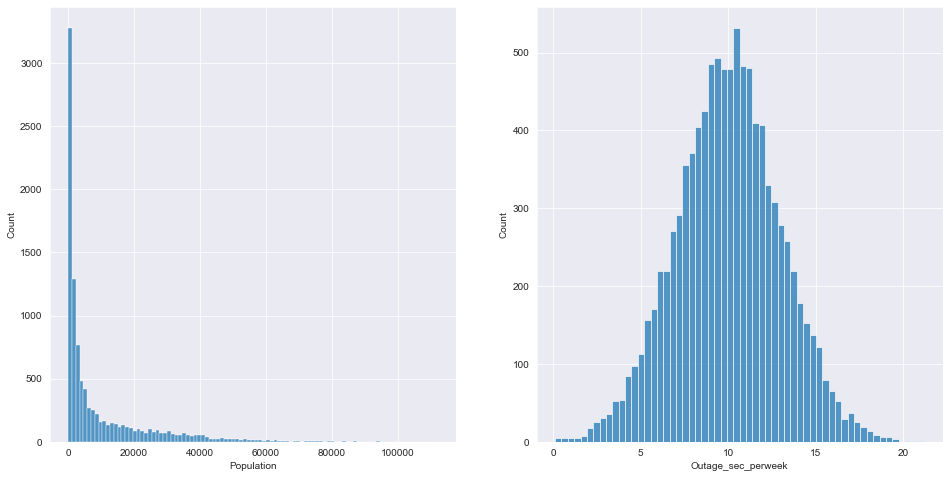

In [13]:
fig, ax = plt.subplots(1,2, figsize=(16,8))
sns.histplot(df.Population, ax=ax[0])
sns.histplot(df.Outage_sec_perweek, ax=ax[1])
plt.show()

The distribution of the population variable is right-skewed.<br>
Outage seconds per week is normally distributed with the mean outage at about 10 seconds.

In [14]:
df.describe()

,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,49153.319600,38.757567,-90.782536,9756.562400,2.0877,53.078400,39806.926771,10.001848,12.016000,0.994200,0.398000,34.526188,172.624816,3392.341550
std,2886.89568,27532.196108,5.437389,15.156142,14432.698671,2.1472,20.698882,28199.916702,2.976019,3.025898,0.988466,0.635953,26.443063,42.943094,2185.294852
min,1.00000,601.000000,17.966120,-171.688150,0.000000,0.0000,18.000000,348.670000,0.099747,1.000000,0.000000,0.000000,1.000259,79.978860,155.506715
25%,2500.75000,26292.500000,35.341828,-97.082812,738.000000,0.0000,35.000000,19224.717500,8.018214,10.000000,0.000000,0.000000,7.917694,139.979239,1236.470827
50%,5000.50000,48869.500000,39.395800,-87.918800,2910.500000,1.0000,53.000000,33170.605000,10.018560,12.000000,1.000000,0.000000,35.430507,167.484700,3279.536903
75%,7500.25000,71866.500000,42.106908,-80.088745,13168.000000,3.0000,71.000000,53246.170000,11.969485,14.000000,2.000000,1.000000,61.479795,200.734725,5586.141370
max,10000.00000,99929.000000,70.640660,-65.667850,111850.000000,10.0000,89.000000,258900.700000,21.207230,23.000000,7.000000,6.000000,71.999280,290.160419,7158.981530


###### D. Bivariate statistics

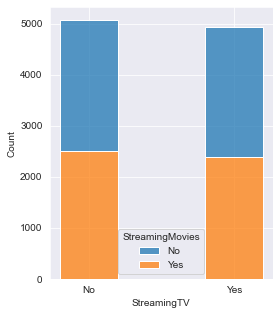

In [18]:
plt.figure(figsize=(4, 5)) 
sns.histplot(binwidth=0.5, x="StreamingTV", hue="StreamingMovies", data=df, stat="count", multiple="stack", shrink=.4)
plt.show()

Though we may expect customers who have streaming TV would be coorelated with those who stream movies, either positively or negatively, the above visualization shows no correlation.

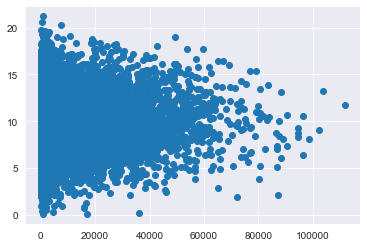

In [20]:
plt.scatter(x='Population', y='Outage_sec_perweek', data=df)
plt.show()

Outage seconds per week falls evenly regarldless of population.

### E

###### E1. Results
The resulting p-value of the anova performed was 0.78. Based on the resulting p-value which is higher than our alpha of 0.05 we fail to reject the null hypothesis, thus we can not determine any statistically significant difference between the groups.

###### E2. Limitations
The limitations of this analysis to bear in mind, only customers of one specific telecom company were collected for the analysis of variance, and we must be careful before determing that the same results would apply in other parts of the population.

###### E3. course of action
Being that we failed to reject the null hypothesis, it is recommended to put on emphasis on collecting income data from customers to better understand churn possibilities, and not rely on marital status alone.

### F. Panopto
The Panopto video can be found - https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=c5fdeda1-c3b5-4c69-9c6f-b138002fc097

### G. Code Reference
Datacamp - Performing Experiments in Python, Part 2, One-Way Anova

### H. Sources
No sources were used for the creation of this document or the
completion of the assessment.